# Radiative Boundary Conditions

In [1]:
<< xAct`xTras`

------------------------------------------------------------
Package xAct`xPerm`  version 1.2.3, {2015, 8, 23}
CopyRight (C) 2003-2020, Jose M. Martin-Garcia, under the General Public\
 
>   License.
Connecting to external mac executable...
Connection established.
------------------------------------------------------------
Package xAct`xTensor`  version 1.2.0, {2021, 10, 17}
CopyRight (C) 2002-2021, Jose M. Martin-Garcia, under the General Public\
 
>   License.
------------------------------------------------------------
Package xAct`xPert`  version 1.0.6, {2018, 2, 28}
CopyRight (C) 2005-2020, David Brizuela, Jose M. Martin-Garcia and Guillermo\
 
>   A. Mena Marugan, under the General Public License.
** Variable $PrePrint assigned value ScreenDollarIndices
** Variable Prefix changed from Prefix to Postfix
** Option AllowUpperDerivatives of ContractMetric changed from False to True
** Option MetricOn of MakeRule changed from None to All
** Option ContractMetrics of MakeRule changed 

#### Define Symbols

In [2]:
Do[DefConstantSymbol[ToExpression["vU" <> ToString[ii]], PrintAs -> ToString[Superscript["v", ToString[ii]], FormatType -> StandardForm]], {ii, 1, 3}];
Do[DefConstantSymbol[ToExpression["sU" <> ToString[ii]], PrintAs -> ToString[Superscript["s", ToString[ii]], FormatType -> StandardForm]], {ii, 1, 3}];
Do[DefConstantSymbol[ToExpression["vD" <> ToString[ii]], PrintAs -> ToString[Subscript["v", ToString[ii]], FormatType -> StandardForm]], {ii, 1, 3}];
Do[DefConstantSymbol[ToExpression["sD" <> ToString[ii]], PrintAs -> ToString[Subscript["s", ToString[ii]], FormatType -> StandardForm]], {ii, 1, 3}];
DefConstantSymbol[sv, PrintAs -> "\*StyleBox[\(\!\(\*StyleBox[\"s\",\nFontWeight->\"Bold\"]\)\[Bullet]\!\(\*StyleBox[\"v\",\nFontWeight->\"Bold\"]\)\)]"];

** DefConstantSymbol: Defining constant symbol vU1. 
** DefConstantSymbol: Defining constant symbol vU2. 
** DefConstantSymbol: Defining constant symbol vU3. 
** DefConstantSymbol: Defining constant symbol sU1. 
** DefConstantSymbol: Defining constant symbol sU2. 
** DefConstantSymbol: Defining constant symbol sU3. 
** DefConstantSymbol: Defining constant symbol vD1. 
** DefConstantSymbol: Defining constant symbol vD2. 
** DefConstantSymbol: Defining constant symbol vD3. 
** DefConstantSymbol: Defining constant symbol sD1. 
** DefConstantSymbol: Defining constant symbol sD2. 
** DefConstantSymbol: Defining constant symbol sD3. 
** DefConstantSymbol: Defining constant symbol sv. 


## Scalar Waves

### EOM
$$
\begin{align}
  \partial_t{u}
  &=\rho, \\
  \partial_t{\rho}
  &=\delta^{kl}\partial_kv_l, \\
  \partial_t{v_k}
  &=\partial_k \rho.
\end{align}
$$

where $v_k\equiv\partial_ku$.

u

ρ

vD1

vD2

vD3
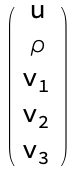

In [7]:
U = {u, \[Rho], vD1, vD2, vD3};
U//MatrixForm

#### Replacement Rules

{sD1 sU1 + sD2 sU2 + sD3 sU3 -> 1, sU1 vD1 + sU2 vD2 + sU3 vD3 -> sv, 
 
>   -(sD1 sU1) - sD2 sU2 - sD3 sU3 -> -1, -(sU1 vD1) - sU2 vD2 - sU3 vD3 -> -sv}
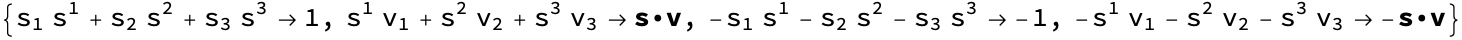

In [9]:
cnd = {
    sD1 sU1+sD2 sU2+sD3 sU3 -> 1,
    sU1 vD1+sU2 vD2+sU3 vD3 -> sv,
    -sD1 sU1-sD2 sU2-sD3 sU3 -> -1,
    -sU1 vD1-sU2 vD2-sU3 vD3 -> -sv
}

### Characteristic Matrix (with respect to normal $s_i$)
$$
\begin{align}
A^{\mathbf{s}\alpha}{}_\beta =
\begin{pmatrix}
0 & 0 & 0 \\
0 & 0 & -s^k \\
0 & -s_j & 0
\end{pmatrix}
\end{align}
$$

0      0      0      0      0

0      0      -sU1   -sU2   -sU3

0      -sD1   0      0      0

0      -sD2   0      0      0

0      -sD3   0      0      0
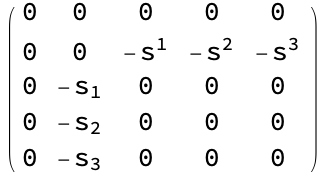

In [10]:
As = {
    {0, 0, 0, 0, 0},
    {0, 0, -sU1, -sU2, -sU3},
    {0, -sD1, 0, 0, 0},
    {0, -sD2, 0, 0, 0},
    {0, -sD3, 0, 0, 0}
};
As//MatrixForm

0

-sv

-(sD1 ρ)

-(sD2 ρ)

-(sD3 ρ)
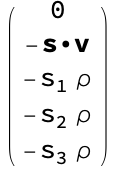

In [12]:
As.U/.cnd//MatrixForm

#### Characteristic Speed

0

0

0

-1

1
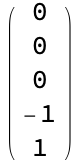

In [13]:
eValue = Eigenvalues[As]/.cnd;
eValue//MatrixForm

#### Left Eigenvectors ($e^{\hat{\alpha}}{}_\mu A^{\mathbf{s}\mu}{}_\beta=v^{(\hat{\alpha})}e^{\hat{\alpha}}{}_\beta$)
$$
\begin{align*}
e^{\hat{\alpha}}{}_\beta=
\begin{pmatrix}
1 &0 &0 \\
0 &1 &s^k \\
0 &1 &-s^k \\
0 & 0 &\delta_j{}^k-s_js^k
\end{pmatrix}
\end{align*}
$$

1                   0                   0                   0
 
>    0

0                   1                   sU1                 sU2
 
>    sU3

0                   1                   -sU1                -sU2
 
>    -sU3

0                   0                   sD2 sU2 + sD3 sU3   -(sD1 sU2)
 
>    -(sD1 sU3)

0                   0                   -(sD2 sU1)          sD1 sU1 + sD3 sU3
 
>    -(sD2 sU3)

0                   0                   -(sD3 sU1)          -(sD3 sU2)          sD1 
 
>     sU1 + sD2 sU2
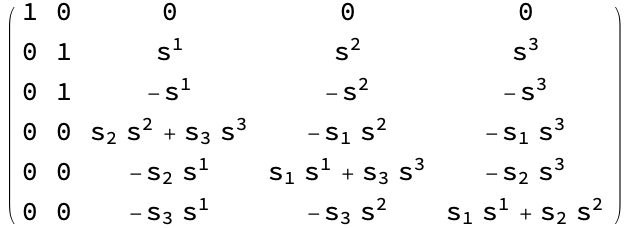

In [15]:
Module[{eLeftVectorRaw = (Inverse[Transpose[Eigenvectors[As]/.cnd]]//Simplify)/.cnd},
eLeftVector = Join[
    {eLeftVectorRaw[[3]]},
    {eLeftVectorRaw[[4]] (2/sD3)//Simplify}/.cnd,
    {-eLeftVectorRaw[[5]] (2/sD3)//Simplify}/.cnd,
    {
        -(eLeftVectorRaw[[2]] (sU2/sU1) + eLeftVectorRaw[[1]] (sU3/sU1))//Simplify,
        eLeftVectorRaw[[2]],
        eLeftVectorRaw[[1]]
    }
]];
eLeftVector//MatrixForm

0   0   0   0   0

0   0   0   0   0

0   0   0   0   0

0   0   0   0   0

0   0   0   0   0

0   0   0   0   0
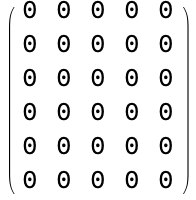

In [17]:
Join[
    {eLeftVector[[1]].As - eLeftVector[[1]]eValue[[1]]},
    {eLeftVector[[2]].As - eLeftVector[[2]]eValue[[4]]/.cnd},
    {eLeftVector[[3]].As - eLeftVector[[3]]eValue[[5]]/.cnd},
    Table[(eLeftVector[[i]].As - eLeftVector[[i]]eValue[[1]]//Simplify)/.cnd, {i,4,6}]
]//MatrixForm

#### Charateristic Fields ($U^{\hat{\alpha}}=e^{\hat{\alpha}}{}_\beta U^{\beta}$)
$$
\begin{align}
  \begin{array}{lll}
    U^{\hat{0}}    &=u, \quad                          &\text{speed} \quad 0, \\
    U^{\hat{1}\pm} &=\rho\mp\mathbf{s}\cdot\mathbf{v},         &\text{speed} \quad \pm 1, \\
    U^{\hat{2}}    &=\mathbf{v}-\mathbf{s}(\mathbf{s}\cdot\mathbf{v}), &\text{speed} \quad 0.
  \end{array}
\end{align}
$$

u

sv + ρ

-sv + ρ

(sD2 sU2 + sD3 sU3) vD1 - sD1 sU2 vD2 - sD1 sU3 vD3

-(sD2 sU1 vD1) + (sD1 sU1 + sD3 sU3) vD2 - sD2 sU3 vD3

-(sD3 sU1 vD1) - sD3 sU2 vD2 + (sD1 sU1 + sD2 sU2) vD3
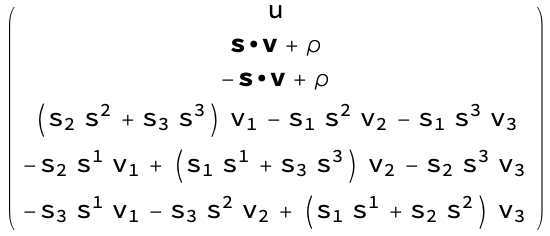

In [18]:
(eLeftVector.U)/.cnd//MatrixForm

#### Right Eigenvectors (left inverse of Left Eigenvectors and $A^{\mathbf{s}\alpha}{}_\mu r^{\mu}{}_{\hat{\beta}} =v_{(\hat{\beta})}r^{\alpha}{}_{\hat{\beta}}$)
$$
\begin{align*}
r^{\hat{\alpha}}{}_\beta=
\begin{pmatrix}
1 &0 &0 &0\\
0 &1/2 &1/2 &0 \\
0 &s_j/2 &-s_j/2 &\delta_j{}^k-s_js^k
\end{pmatrix}
\end{align*}
$$

1                   0                   0                   0
 


>    0                   0

                    1                   1
                    -                   -
0                   2                   2                   0
 


>    0                   0

                    sD1                   1
                    ---                 -(-) sD1
0                    2                    2                 sD2 sU2 + sD3 sU3
 


>    -(sD1 sU2)          -(sD1 sU3)

                    sD2                   1
                    ---                 -(-) sD2
0                    2                    2                 -(sD2 sU1)
 


>    sD1 sU1 + sD3 sU3   -(sD2 sU3)

                    sD3                   1
                    ---                 -(-) sD3
0                    2                    2                 -(sD3 sU1)
 


>    -(sD3 sU2)          sD1 sU1 + sD2 sU2
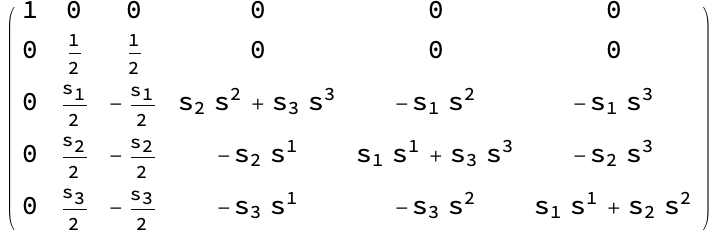

In [19]:
Module[{eRightVectorRaw = Eigenvectors[As]/.cnd},
eRightVector = Transpose[Join[
    {eRightVectorRaw[[3]]},
    {eRightVectorRaw[[4]]sD3/2},
    -{eRightVectorRaw[[5]]sD3/2},
    {-eRightVectorRaw[[1]]sU1 sD3 - eRightVectorRaw[[2]]sU1 sD2},
    {-eRightVectorRaw[[1]]sU2 sD3 + eRightVectorRaw[[2]](sU3 sD3+sD1 sU1)}//Simplify,
    {+eRightVectorRaw[[1]](sD1 sU1+sD2 sU2) - eRightVectorRaw[[2]]sD2 sU3}//Simplify
]]];
eRightVector//MatrixForm

0   0   0   0   0

0   0   0   0   0

0   0   0   0   0

0   0   0   0   0

0   0   0   0   0

0   0   0   0   0
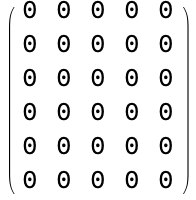

In [21]:
Join[
    {As.(eRightVector[[All, 1]]) - eValue[[1]]eRightVector[[All, 1]]},
    {As.(eRightVector[[All, 2]]) - eValue[[4]]eRightVector[[All, 2]]//Simplify}/.cnd,
    {As.(eRightVector[[All, 3]]) - eValue[[5]]eRightVector[[All, 3]]//Simplify}/.cnd,
    Table[(As.eRightVector[[All, i]] - eValue[[1]]eRightVector[[All, i]]//Simplify)/.cnd, {i,4,6}]
]//MatrixForm

1                   0                   0                   0
 
>    0

0                   1                   sU1                 sU2
 
>    sU3

0                   1                   -sU1                -sU2
 
>    -sU3

0                   0                   sD2 sU2 + sD3 sU3   -(sD1 sU2)
 
>    -(sD1 sU3)

0                   0                   -(sD2 sU1)          sD1 sU1 + sD3 sU3
 
>    -(sD2 sU3)

0                   0                   -(sD3 sU1)          -(sD3 sU2)          sD1 
 
>     sU1 + sD2 sU2
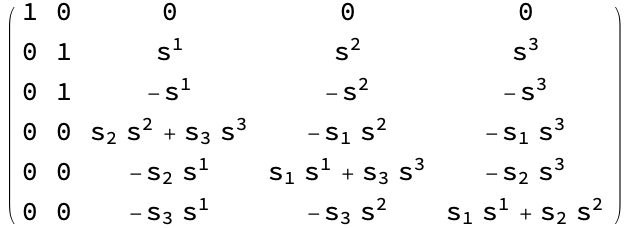

In [22]:
eLeftVector//MatrixForm

1                   0                   0                   0
 


>    0                   0

                    1                   1
                    -                   -
0                   2                   2                   0
 


>    0                   0

                    sD1                   1
                    ---                 -(-) sD1
0                    2                    2                 sD2 sU2 + sD3 sU3
 


>    -(sD1 sU2)          -(sD1 sU3)

                    sD2                   1
                    ---                 -(-) sD2
0                    2                    2                 -(sD2 sU1)
 


>    sD1 sU1 + sD3 sU3   -(sD2 sU3)

                    sD3                   1
                    ---                 -(-) sD3
0                    2                    2                 -(sD3 sU1)
 


>    -(sD3 sU2)          sD1 sU1 + sD2 sU2
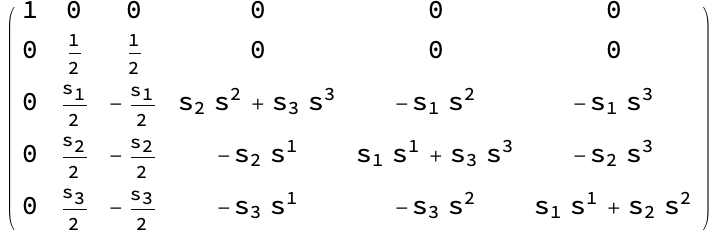

In [270]:
eRightVector//MatrixForm

1                   0                   0                   0
 
>    0                   0

0                   1                   0                   0
 
>    0                   0

0                   0                   1                   0
 
>    0                   0

0                   0                   0                   sD2 sU2 + sD3 sU3
 
>    -(sD1 sU2)          -(sD1 sU3)

0                   0                   0                   -(sD2 sU1)          sD1 
 
>     sU1 + sD3 sU3   -(sD2 sU3)

0                   0                   0                   -(sD3 sU1)
 
>    -(sD3 sU2)          sD1 sU1 + sD2 sU2
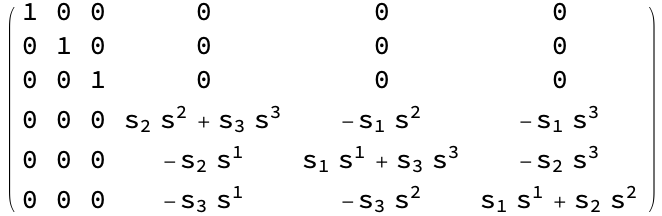

In [23]:
(eLeftVector.eRightVector//Simplify)/.cnd//MatrixForm

#### Inverse of Left Eigenvector
$$
\begin{align*}
e^{\alpha}{}_{\hat{\beta}}=
\begin{pmatrix}
1 &0 &0 &0\\
0 &1/2 &1/2 &0 \\
0 &s_j/2 &-s_j/2 &\delta_j{}^k \\
\end{pmatrix}
\end{align*}
$$

1          0          0          0          0          0

           1          1
           -          -
0          2          2          0          0          0

           sD1          1
           ---        -(-) sD1
0           2           2        1          0          0

           sD2          1
           ---        -(-) sD2
0           2           2        0          1          0

           sD3          1
           ---        -(-) sD3
0           2           2        0          0          1
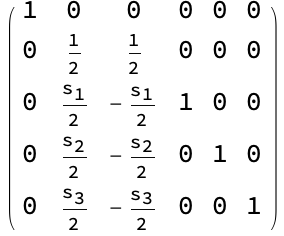

In [51]:
(*eRightVector = PseudoInverse[eLeftVector]*)
eRightVector = {
    {1, 0, 0, 0, 0, 0},
    {0, 1/2, 1/2, 0, 0, 0},
    {0, sD1/2, -sD1/2, 1, 0, 0},
    {0, sD2/2, -sD2/2, 0, 1, 0},
    {0, sD3/2, -sD3/2, 0, 0, 1}
};
eRightVector//MatrixForm

0          0          0          0          0          0

             1        1
           -(-)       -
0            2        2          -sU1       -sU2       -sU3

             1          1
           -(-) sD1   -(-) sD1
0            2          2        0          0          0

             1          1
           -(-) sD2   -(-) sD2
0            2          2        0          0          0

             1          1
           -(-) sD3   -(-) sD3
0            2          2        0          0          0
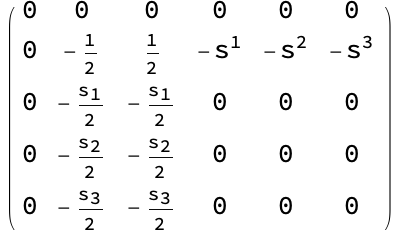

In [71]:
(As.eRightVector//Simplify)/.cnd//MatrixForm

1  sD1  sD2  sD3
{0, -, ---, ---, ---}
    2   2    2    2
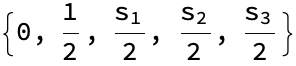

In [96]:
eRightVector[[All, 2]]

{0, -sU1, 0, 0, 0}
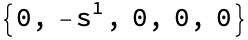

In [95]:
As.(eRightVector[[All,4]])

{{0, -sU1, 0, 0, 0}}
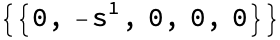

In [93]:
Table[(As.eRightVector[[All, i]] - eValue[[1]]eRightVector[[All, i]]//Simplify)/.cnd, {i,4,4}]

It's left inverse of $e^{\hat{\alpha}}{}_{\beta}$
$$e^{\alpha}{}_{\hat{\gamma}}e^{\hat{\gamma}}{}_\beta=\delta^\alpha{}_{\beta}$$

1   0   0   0   0

0   1   0   0   0

0   0   1   0   0

0   0   0   1   0

0   0   0   0   1
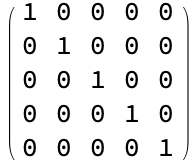

In [87]:
eRightVector.eLeftVector/.cnd//MatrixForm

But not the right inverse
$$e^{\hat{\alpha}}{}_{\gamma}e^{\gamma}{}_{\hat{\beta}}\neq \delta^{\hat{\alpha}}{}_{\hat{\beta}}$$

1                   0                   0                   0
 
>    0                   0

0                   1                   0                   sU1
 
>    sU2                 sU3

0                   0                   1                   -sU1
 
>    -sU2                -sU3

0                   0                   0                   sD2 sU2 + sD3 sU3
 
>    -(sD1 sU2)          -(sD1 sU3)

0                   0                   0                   -(sD2 sU1)          sD1 
 
>     sU1 + sD3 sU3   -(sD2 sU3)

0                   0                   0                   -(sD3 sU1)
 
>    -(sD3 sU2)          sD1 sU1 + sD2 sU2
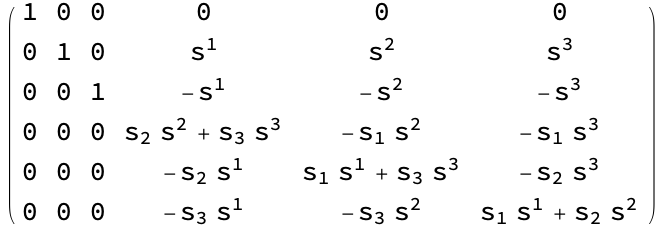

In [89]:
(eLeftVector.eRightVector/.cnd//Simplify)/.cnd//MatrixForm

### Radiative Boundary Condition

$$U^{\hat{1}-}=0$$